# Curso de introducción al análisis y modelado de datos con Python 

<img src="../images/cacheme.png" alt="logo" style="width: 150px;"/>
<img src="../images/aeropython_logo.png" alt="logo" style="width: 115px;"/>

---

# Scikit-Learn: Reducción de la dimensionalidad y Clustering.

En esta clase veremos cómo utilizar el paquete `scikit-learn` de Python para resolver problemas de aprendizaje automático no supervisados, utilizando algoritmos de Reducción de la dimensionalidad y Clustering.

In [2]:
# preserve
np.random.seed(42)

## Reducción de dimensionalidad

Vamos a rescatar nuestro dataset de los dígitos y tratar de visualizarlo en dos dimensiones, lo que se conoce como _reducción de dimensionalidad_.

In [ ]:
# cargamos el dataset de los dígitos

In [ ]:
# importamos isomap y multidimensional scaling de manifold

#### Multidimensional Scaling 

In [ ]:
# mds

#### IsoMap 

https://en.wikipedia.org/wiki/Isomap

> Isomap is one representative of isometric mapping methods, and extends metric multidimensional scaling (MDS) by incorporating the geodesic distances imposed by a weighted graph. To be specific, the classical scaling of metric MDS performs low-dimensional embedding based on the pairwise distance between data points, which is generally measured using straight-line Euclidean distance. Isomap is distinguished by its use of the geodesic distance induced by a neighborhood graph embedded in the classical scaling. This is done to incorporate manifold structure in the resulting embedding. Isomap defines the geodesic distance to be the sum of edge weights along the shortest path between two nodes (computed using Dijkstra's algorithm, for example). The top n eigenvectors of the geodesic distance matrix, represent the coordinates in the new n-dimensional Euclidean space.


In [ ]:
# creamos un isomap de dos componentes

In [ ]:
# entrenamos

Y ahora proyectamos los datos usando `.transform`:

In [ ]:
# transformamos

In [ ]:
# representamos

## Clustering

 En primer lugar vamos a fabricar dos nubes de puntos usando la función `make_blobs`:

In [11]:
# preserve
# https://github.com/amueller/scipy-2016-sklearn/blob/master/notebooks/05%20Supervised%20Learning%20-%20Classification.ipynb
from sklearn.datasets import make_blobs

In [12]:
# preserve
# creamos los blobs
features, labels = make_blobs(centers=[[6, 0], [2, -1]], random_state=0)
features.shape

(100, 2)

In [ ]:
# representamos las nubes de puntos

Hemos creado dos grupos y algunos puntos se solapan, pero ¿qué pasaría si no tuviésemos esta información visual? Vamos a emplear un modelo de clustering para agrupar los datos:

In [ ]:
# importamos kmeans

Ejemplo del funcionamiento de K-Means: https://youtu.be/_aWzGGNrcic?t=266

In [ ]:
# creamos el modelo

Observa que por defecto tenemos 8 clusters. Veamos qué ocurre:

In [ ]:
# lo entrenamos

Ahora **no** pasamos la información de las etiquetas al algoritmo a la hora de entrenar. En la práctica por supuesto no la tendremos.

In [ ]:
# obtenemos los centroides

In [ ]:
# predecimos a qué grupo pertencen los puntos que tenemos

Y ahora preparamos el código para representar todas las regiones:

In [19]:
# preserve
# Creamos la malla
xmin, xmax = features[:, 0].min(), features[:, 0].max()
ymin, ymax = features[:, 1].min(), features[:, 1].max()

xx, yy = np.meshgrid(
    np.linspace(xmin, xmax),
    np.linspace(ymin, ymax)
)

In [20]:
# preserve
# Preparamos la malla para pasar por el modelo
mesh = np.hstack((xx.reshape(-1, 1), yy.reshape(-1, 1)))
mesh

array([[ 0.50874241, -3.22340315],
       [ 0.66713041, -3.22340315],
       [ 0.82551842, -3.22340315],
       ...,
       [ 7.95297862,  2.2408932 ],
       [ 8.11136662,  2.2408932 ],
       [ 8.26975462,  2.2408932 ]])

In [21]:
# preserve
# Predecimos para los valores de la malla
Z = model.predict(mesh)

Z = Z.reshape(xx.shape)

In [ ]:
# pintamos
# http://pybonacci.org/2015/01/14/introduccion-a-machine-learning-con-python-parte-1/

Si lo metemos todo en una función interactiva:

In [24]:
# preserve
def cluster(n=3):
    model = KMeans(n_clusters=n)
    model.fit(features)
    labels_pred = model.predict(features)
    centroids = model.cluster_centers_

    Z = model.predict(mesh)

    plt.pcolormesh(xx, yy, Z.reshape(xx.shape))
    plt.scatter(features[:, 0], features[:, 1], marker='x', color='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', color='r', lw=2)

    plt.show()

In [ ]:
# interact

## Ejercicio

1. Visualiza el dataset de las flores (`load_iris`) utilizando las funciones que tienes más abajo. ¿Hay alguna forma clara de separar las tres especies de flores?
2. Separa el dataset en matriz de características `features` y vector de etiquetas `labels`. Conviértelos a arrays de NumPy usando `.as_matrix()`.
3. Reduce la dimensionalidad del dataset a 2 usando `sklearn.manifold.Isomap` o `sklearn.decomposition.PCA` y usa un algoritmo de clustering con 3 clusters. ¿Se parecen los clusters que aparecen a los grupos originales?
4. Predice el tipo de flor usando un algoritmo de clasificación. Visualiza la matriz de confusión. ¿Cuál es el porcentaje de aciertos del algoritmo? ¿Es más certero en algún tipo de flor en concreto? ¿Concuerda esto con lo que pensaste en el apartado 1?

In [26]:
# preserve
import pandas as pd

def load_iris_df():
    from sklearn.datasets import load_iris

    iris = load_iris()
    features, labels = iris.data, iris.target

    df = pd.DataFrame(features, columns=iris.feature_names)
    df["species"] = pd.Categorical.from_codes(iris.target, categories=iris.target_names)

    #df = df.replace({'species': {0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]}})

    return df

iris_df = load_iris_df()

In [27]:
# preserve
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


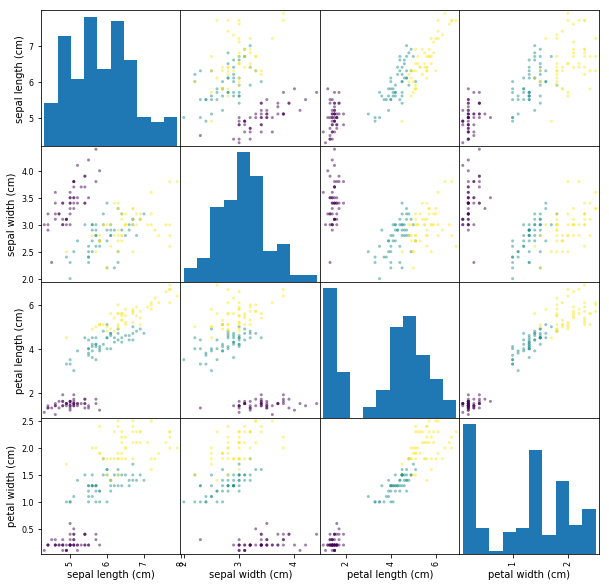

In [28]:
# preserve
_ = pd.plotting.scatter_matrix(iris_df, c=iris_df["species"].cat.codes, figsize=(10, 10))

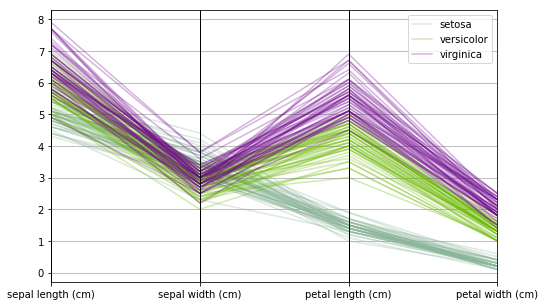

In [29]:
# preserve
# parallel coordinates
plt.figure(figsize=(8, 5))
_ = pd.plotting.parallel_coordinates(iris_df, 'species', alpha=0.3)

In [ ]:
# andrews

In [31]:
# preserve
from sklearn.model_selection import train_test_split

In [32]:
# preserve
features = iris_df.iloc[:, :4].as_matrix()
target = iris_df.iloc[:, -1].as_matrix()

In [ ]:
# division en validacion y test

## Normalización de los datos 

In [ ]:
# de las funciones de preprocesado se importa standardscaler

In [ ]:
# se normalizan los datos creando un scaler
# x_train_norm
# x_test_norm

In [36]:
# preserve
scaler.mean_, scaler.scale_

(array([5.84555556, 3.04111111, 3.70444444, 1.18444444]),
 array([0.80624798, 0.46497179, 1.7106796 , 0.75364464]))

In [37]:
# preserve
iris_df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.054000
petal length (cm)    3.758667
petal width (cm)     1.198667
dtype: float64

## Clasificación con KNN

In [ ]:
# importamos el clasificador knn de neighbours

In [ ]:
# creación del clasificador
# entrenamiento

In [ ]:
# acierto

## Selección de número de vecinos

### ¿Qué ocurre si variamos el número de vecinos? ¿y si solo tomamos uno?

Probemos a pasar los datos de entrenamiento para verlo más claro

In [ ]:
# creación del clasificador
# entrenamiento

La clasificación con un solo vecino asigna el mismo grupo al que pertenece el vecino más cercano

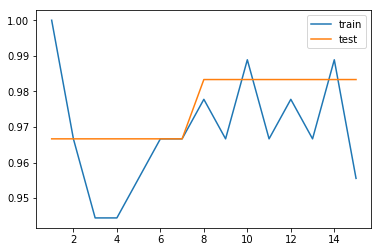

In [43]:
# preserve
n_neighbours = np.arange(1, 16)
test_score = np.zeros_like(n_neighbours, dtype=float)
train_score = np.zeros_like(n_neighbours, dtype=float)

for ii, n in enumerate(n_neighbours):
    clf = KNeighborsClassifier(n_neighbors=n)
    # Entrenamiento
    clf.fit(X_train, Y_train)
    # Acierto     
    train_score[ii] = clf.score(X_train, Y_train)
    test_score[ii] = clf.score(X_test, Y_test)

plt.plot(n_neighbours, train_score, label='train')
plt.plot(n_neighbours, test_score, label='test')
plt.legend()

### ¿Cómo debemos fijar los hiperparámetros? 

In [ ]:
# de las herramientas de seleccion de modelos importamos gridsearch

In [45]:
# preserve
n_neighbours = np.arange(1, 16)
params = {'n_neighbors': n_neighbours}

In [ ]:
# creamos el clf con gridsearch
# lo entrenamos

Una vez que se ha hecho el grid search, el objecto contiene información acerca del índice de acierto para cada valor de hiperparámetro en el atributo `.grid_scores_`:

In [ ]:
# vemos los resultados en cv_results_

In [48]:
# preserve
grid_scores = pd.DataFrame(clf.cv_results_)
grid_scores.head()

/home/asaez/miniconda3/envs/cacheme-datos/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/asaez/miniconda3/envs/cacheme-datos/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/asaez/miniconda3/envs/cacheme-datos/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001014,0.001937,0.933333,1.000000,1,{'n_neighbors': 1},12,0.870968,1.0,0.966667,1.000000,0.965517,1.000000,0.000061,0.000238,0.045209,0.000000
1,0.000807,0.001432,0.933333,0.966940,2,{'n_neighbors': 2},12,0.870968,1.0,0.966667,0.950000,0.965517,0.950820,0.000078,0.000152,0.045209,0.023379
2,0.000454,0.000812,0.955556,0.955829,3,{'n_neighbors': 3},4,0.903226,1.0,1.000000,0.916667,0.965517,0.950820,0.000039,0.000078,0.040418,0.034205
3,0.000354,0.000660,0.933333,0.966758,4,{'n_neighbors': 4},12,0.903226,1.0,0.966667,0.916667,0.931034,0.983607,0.000023,0.000046,0.026159,0.036046
4,0.000287,0.000525,0.955556,0.966849,5,{'n_neighbors': 5},4,0.903226,1.0,1.000000,0.933333,0.965517,0.967213,0.000002,0.000002,0.040418,0.027218


In [ ]:
# pintamos la puntuación media
# la comparamos con la anterior

In [ ]:
# buscamos el mejor valor de parámetro

### ¿Cómo elegir los datos de validación y test? 

In [51]:
# preserve
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
# creamos un clasificador

In [ ]:
# vemos la puntuación de la validación cruzada

In [ ]:
# vemos la predicción con validación cruzada

###### Juan Luis Cano, Alejandro Sáez, Mabel Delgado

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [ ]:
# esta celda da el estilo al notebook